# 房价数据可视化

In [2]:
import json

In [3]:
with open("../data/house_data.json", 'r') as f:
    houses = json.load(f)
houses[0]

{'id': 1,
 'price_per_meter': '26641',
 'lon': '116.480977',
 'lat': '39.886406',
 'county': '朝阳',
 'town': '北工大',
 'community_name': '磨房北里',
 'floor': '底层(共6层)'}

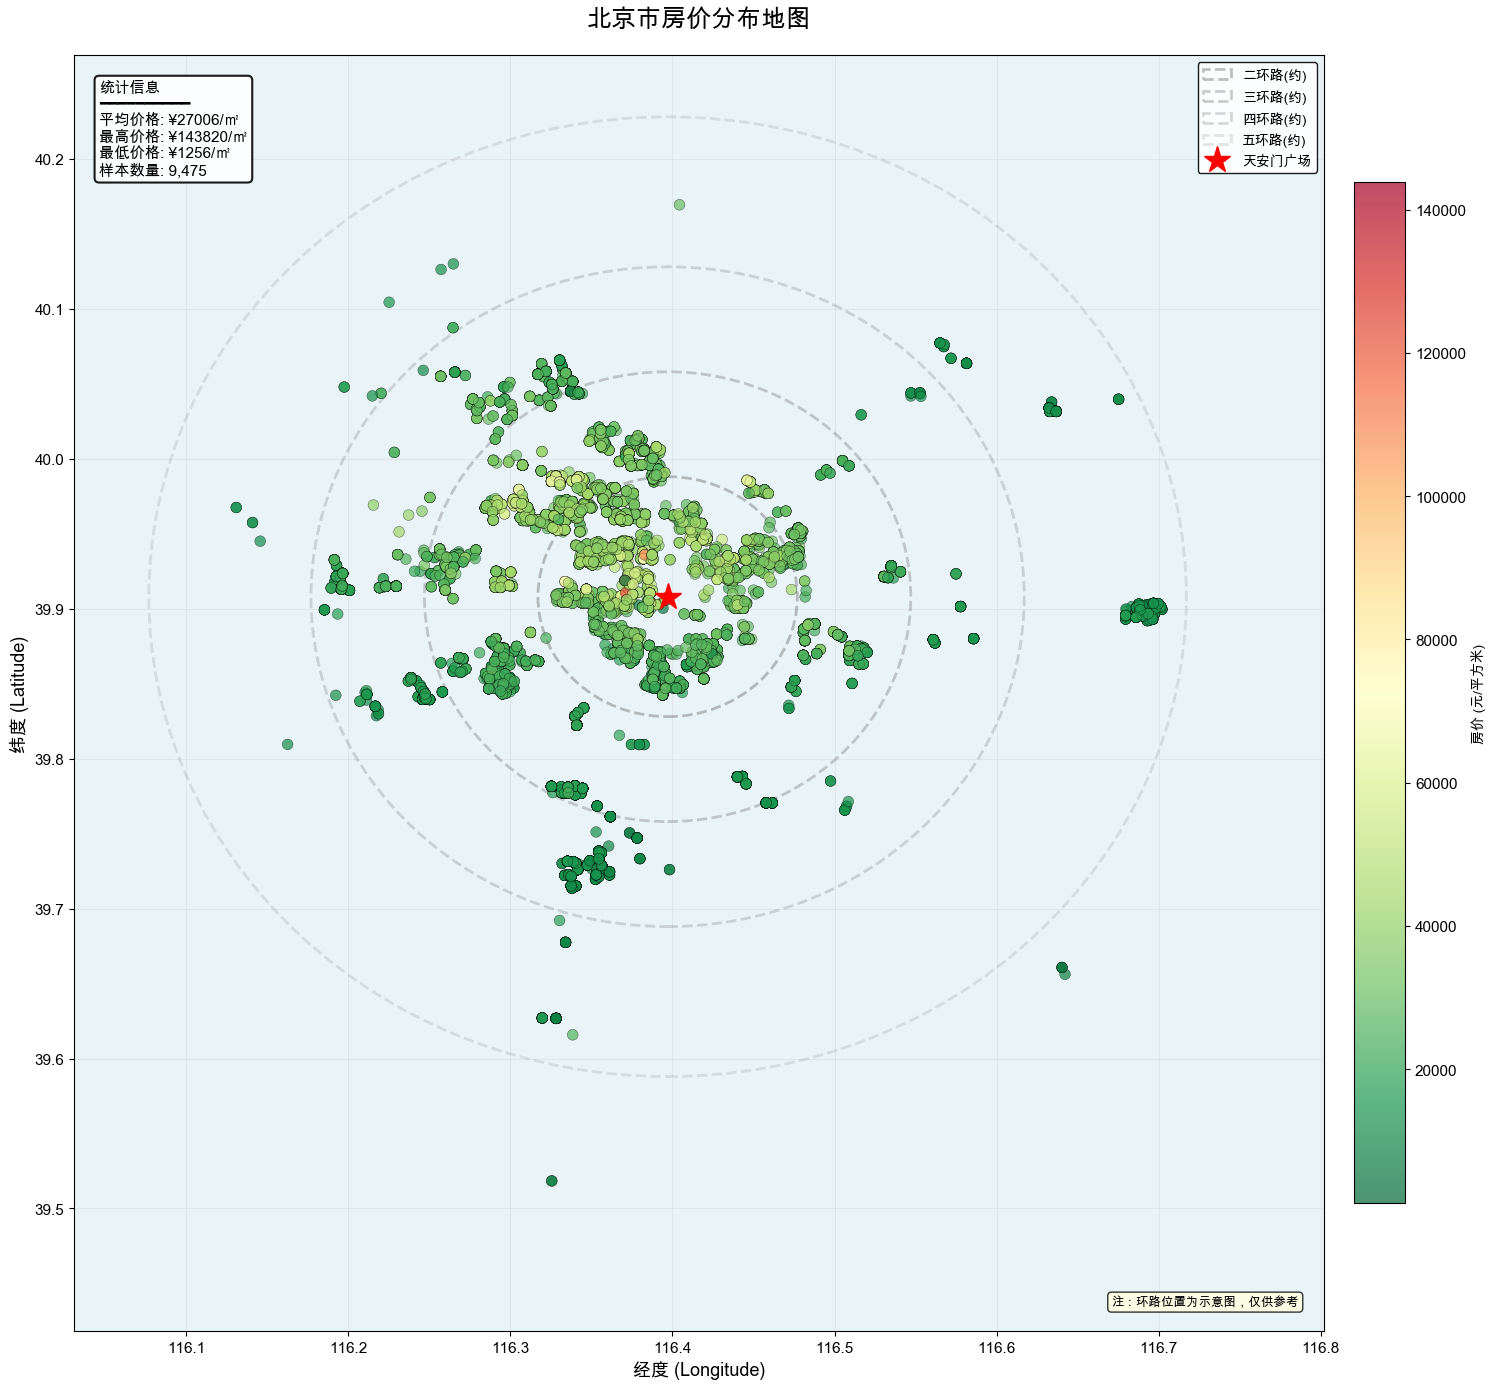

✓ 共绘制 9,475 个房源数据点
✓ 价格范围: ¥1256 - ¥143820 元/平方米
✓ 地图已保存至: ../image/beijing_house_price_map.png


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

# 提取数据
lons = []
lats = []
prices = []

for house in houses:
    try:
        lon = float(house['lon'])
        lat = float(house['lat'])
        price = float(house['price_per_meter'])
        
        lons.append(lon)
        lats.append(lat)
        prices.append(price)
    except (ValueError, KeyError):
        continue

# 转换为numpy数组
lons = np.array(lons)
lats = np.array(lats)
prices = np.array(prices)

# 创建图形
fig, ax = plt.subplots(figsize=(16, 14))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']  # 支持中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置坐标轴范围（北京市范围）
lon_min, lon_max = 115.4, 117.5
lat_min, lat_max = 39.4, 41.1

# 添加背景色（模拟地图）
ax.set_facecolor('#E8F4F8')  # 浅蓝色背景

# 绘制网格作为地图参考线
ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.8, color='#CCCCCC')

# 绘制散点图，使用价格作为颜色映射
scatter = ax.scatter(lons, lats, c=prices, cmap='RdYlGn_r', 
                     s=60, alpha=0.7, edgecolors='black', linewidth=0.3,
                     zorder=3)

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax, label='房价 (元/平方米)', pad=0.02, shrink=0.8)
cbar.ax.tick_params(labelsize=11)

# 添加北京主要环路的大致位置（简化示意）
# 二环路大致范围
circle2 = plt.Circle((116.397, 39.908), 0.08, fill=False, edgecolor='gray', 
                      linewidth=2, linestyle='--', alpha=0.5, label='二环路(约)', zorder=2)
ax.add_patch(circle2)

# 三环路大致范围
circle3 = plt.Circle((116.397, 39.908), 0.15, fill=False, edgecolor='gray', 
                      linewidth=2, linestyle='--', alpha=0.4, label='三环路(约)', zorder=2)
ax.add_patch(circle3)

# 四环路大致范围
circle4 = plt.Circle((116.397, 39.908), 0.22, fill=False, edgecolor='gray', 
                      linewidth=2, linestyle='--', alpha=0.3, label='四环路(约)', zorder=2)
ax.add_patch(circle4)

# 五环路大致范围
circle5 = plt.Circle((116.397, 39.908), 0.32, fill=False, edgecolor='gray', 
                      linewidth=2, linestyle='--', alpha=0.2, label='五环路(约)', zorder=2)
ax.add_patch(circle5)

# 标注天安门广场位置（北京市中心）
ax.plot(116.397, 39.908, 'r*', markersize=20, label='天安门广场', zorder=4)

# 设置标题和标签
ax.set_title('北京市房价分布地图', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('经度 (Longitude)', fontsize=13)
ax.set_ylabel('纬度 (Latitude)', fontsize=13)

# 设置坐标轴范围
ax.set_xlim(lons.min() - 0.1, lons.max() + 0.1)
ax.set_ylim(lats.min() - 0.1, lats.max() + 0.1)

# 设置刻度格式
ax.tick_params(labelsize=11)

# 添加统计信息
price_stats = f'统计信息\n'
price_stats += f'━━━━━━━━━━\n'
price_stats += f'平均价格: ¥{prices.mean():.0f}/㎡\n'
price_stats += f'最高价格: ¥{prices.max():.0f}/㎡\n'
price_stats += f'最低价格: ¥{prices.min():.0f}/㎡\n'
price_stats += f'样本数量: {len(prices):,}'

ax.text(0.02, 0.98, price_stats, transform=ax.transAxes,
        fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='black', linewidth=1.5),
        zorder=5)

# 添加图例
legend = ax.legend(loc='upper right', fontsize=10, framealpha=0.9, edgecolor='black')
legend.set_zorder(5)

# 添加比例尺说明
scale_text = '注：环路位置为示意图，仅供参考'
ax.text(0.98, 0.02, scale_text, transform=ax.transAxes,
        fontsize=9, horizontalalignment='right', style='italic',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
        zorder=5)

plt.tight_layout()
plt.savefig('../image/beijing_house_price_map.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ 共绘制 {len(prices):,} 个房源数据点")
print(f"✓ 价格范围: ¥{prices.min():.0f} - ¥{prices.max():.0f} 元/平方米")
print(f"✓ 地图已保存至: ../image/beijing_house_price_map.png")

In [5]:
# 安装必要的地图库
!pip install contextily folium -q

⚠ 地图底图加载失败: The EPSG code is unknown. PROJ: internal_proj_create_from_database: /opt/anaconda3/envs/network_analysis/share/proj/proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 3 is expected. It comes from another PROJ installation.
  使用备用方案...


ERROR 1: PROJ: internal_proj_create_from_database: /opt/anaconda3/envs/network_analysis/share/proj/proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 3 is expected. It comes from another PROJ installation.
/var/folders/0m/2sbyxxc10czg8dp3clzyzxym0000gn/T/ipykernel_12045/3970636767.py:93: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/0m/2sbyxxc10czg8dp3clzyzxym0000gn/T/ipykernel_12045/3970636767.py:93: UserWarning: Glyph 32479 (\N{CJK UNIFIED IDEOGRAPH-7EDF}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/0m/2sbyxxc10czg8dp3clzyzxym0000gn/T/ipykernel_12045/3970636767.py:93: UserWarning: Glyph 35745 (\N{CJK UNIFIED IDEOGRAPH-8BA1}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/0m/2sbyxxc10czg8dp3clzyzxym0000gn/T/ipykernel_12045/3970636767.py:93: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans Mono.
  plt.t

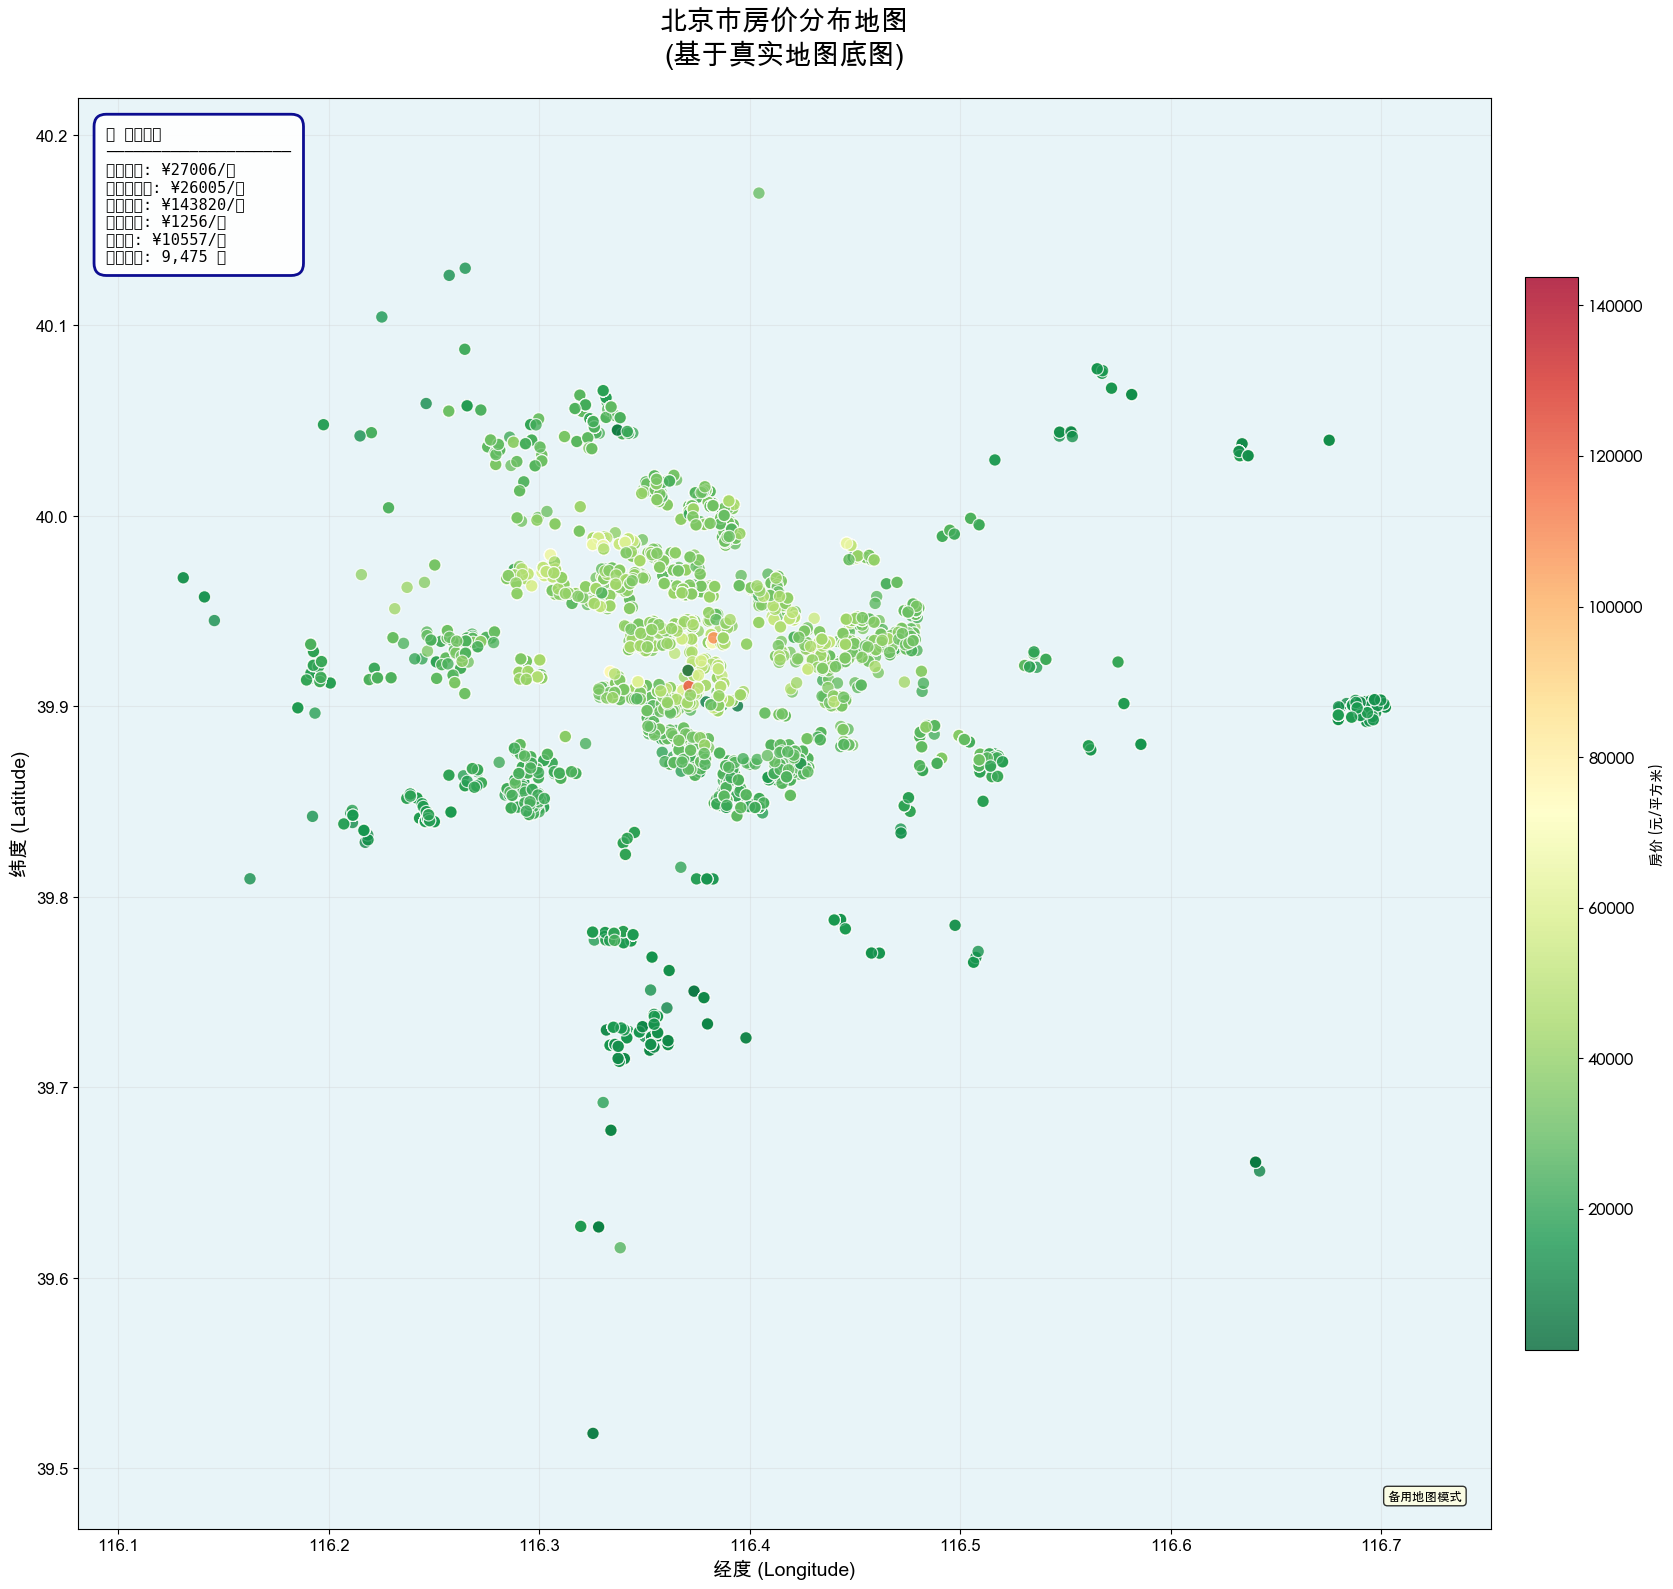


✓ 共绘制 9,475 个房源数据点
✓ 价格范围: ¥1256 - ¥143820 元/平方米
✓ 平均价格: ¥27006/㎡
✓ 地图已保存至: ../image/beijing_house_price_map_with_basemap.png


In [6]:
import contextily as ctx
import matplotlib.pyplot as plt
import numpy as np

# 提取数据
lons = []
lats = []
prices = []

for house in houses:
    try:
        lon = float(house['lon'])
        lat = float(house['lat'])
        price = float(house['price_per_meter'])
        
        lons.append(lon)
        lats.append(lat)
        prices.append(price)
    except (ValueError, KeyError):
        continue

# 转换为numpy数组
lons = np.array(lons)
lats = np.array(lats)
prices = np.array(prices)

# 创建图形
fig, ax = plt.subplots(figsize=(18, 16))
plt.rcParams['font.family'] = 'Heiti TC'
plt.rcParams['axes.unicode_minus'] = False

# 绘制散点图
scatter = ax.scatter(lons, lats, c=prices, cmap='RdYlGn_r', 
                     s=80, alpha=0.8, edgecolors='white', linewidth=0.8,
                     zorder=5)

# 添加真实地图底图（OpenStreetMap）
try:
    ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik, 
                    attribution=False, alpha=0.6, zorder=1)
    map_loaded = True
    print("✓ 地图底图加载成功")
except Exception as e:
    print(f"⚠ 地图底图加载失败: {e}")
    print("  使用备用方案...")
    ax.set_facecolor('#E8F4F8')
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.8, color='#CCCCCC')
    map_loaded = False

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax, label='房价 (元/平方米)', pad=0.02, shrink=0.75)
cbar.ax.tick_params(labelsize=12)

# 设置标题和标签
ax.set_title('北京市房价分布地图\n(基于真实地图底图)', fontsize=20, fontweight='bold', pad=25)
ax.set_xlabel('经度 (Longitude)', fontsize=14, fontweight='bold')
ax.set_ylabel('纬度 (Latitude)', fontsize=14, fontweight='bold')

# 设置坐标轴范围
ax.set_xlim(lons.min() - 0.05, lons.max() + 0.05)
ax.set_ylim(lats.min() - 0.05, lats.max() + 0.05)

# 设置刻度格式
ax.tick_params(labelsize=12)

# 添加统计信息
price_stats = f'📊 统计信息\n'
price_stats += f'{"─"*20}\n'
price_stats += f'平均价格: ¥{prices.mean():.0f}/㎡\n'
price_stats += f'中位数价格: ¥{np.median(prices):.0f}/㎡\n'
price_stats += f'最高价格: ¥{prices.max():.0f}/㎡\n'
price_stats += f'最低价格: ¥{prices.min():.0f}/㎡\n'
price_stats += f'标准差: ¥{prices.std():.0f}/㎡\n'
price_stats += f'样本数量: {len(prices):,} 套'

ax.text(0.02, 0.98, price_stats, transform=ax.transAxes,
        fontsize=11, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='white', 
                  alpha=0.95, edgecolor='darkblue', linewidth=2),
        zorder=10)

# 添加数据来源说明
if map_loaded:
    source_text = '地图来源: OpenStreetMap © OSM Contributors'
else:
    source_text = '备用地图模式'
    
ax.text(0.98, 0.02, source_text, transform=ax.transAxes,
        fontsize=9, horizontalalignment='right', style='italic',
        bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8),
        zorder=10)

plt.tight_layout()
plt.savefig('../image/beijing_house_price_map_with_basemap.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ 共绘制 {len(prices):,} 个房源数据点")
print(f"✓ 价格范围: ¥{prices.min():.0f} - ¥{prices.max():.0f} 元/平方米")
print(f"✓ 平均价格: ¥{prices.mean():.0f}/㎡")
print(f"✓ 地图已保存至: ../image/beijing_house_price_map_with_basemap.png")

✓ 提取到 9475 个有效数据点
✓ 底图加载成功（Web Mercator 方式）
✓ 底图加载成功（Web Mercator 方式）


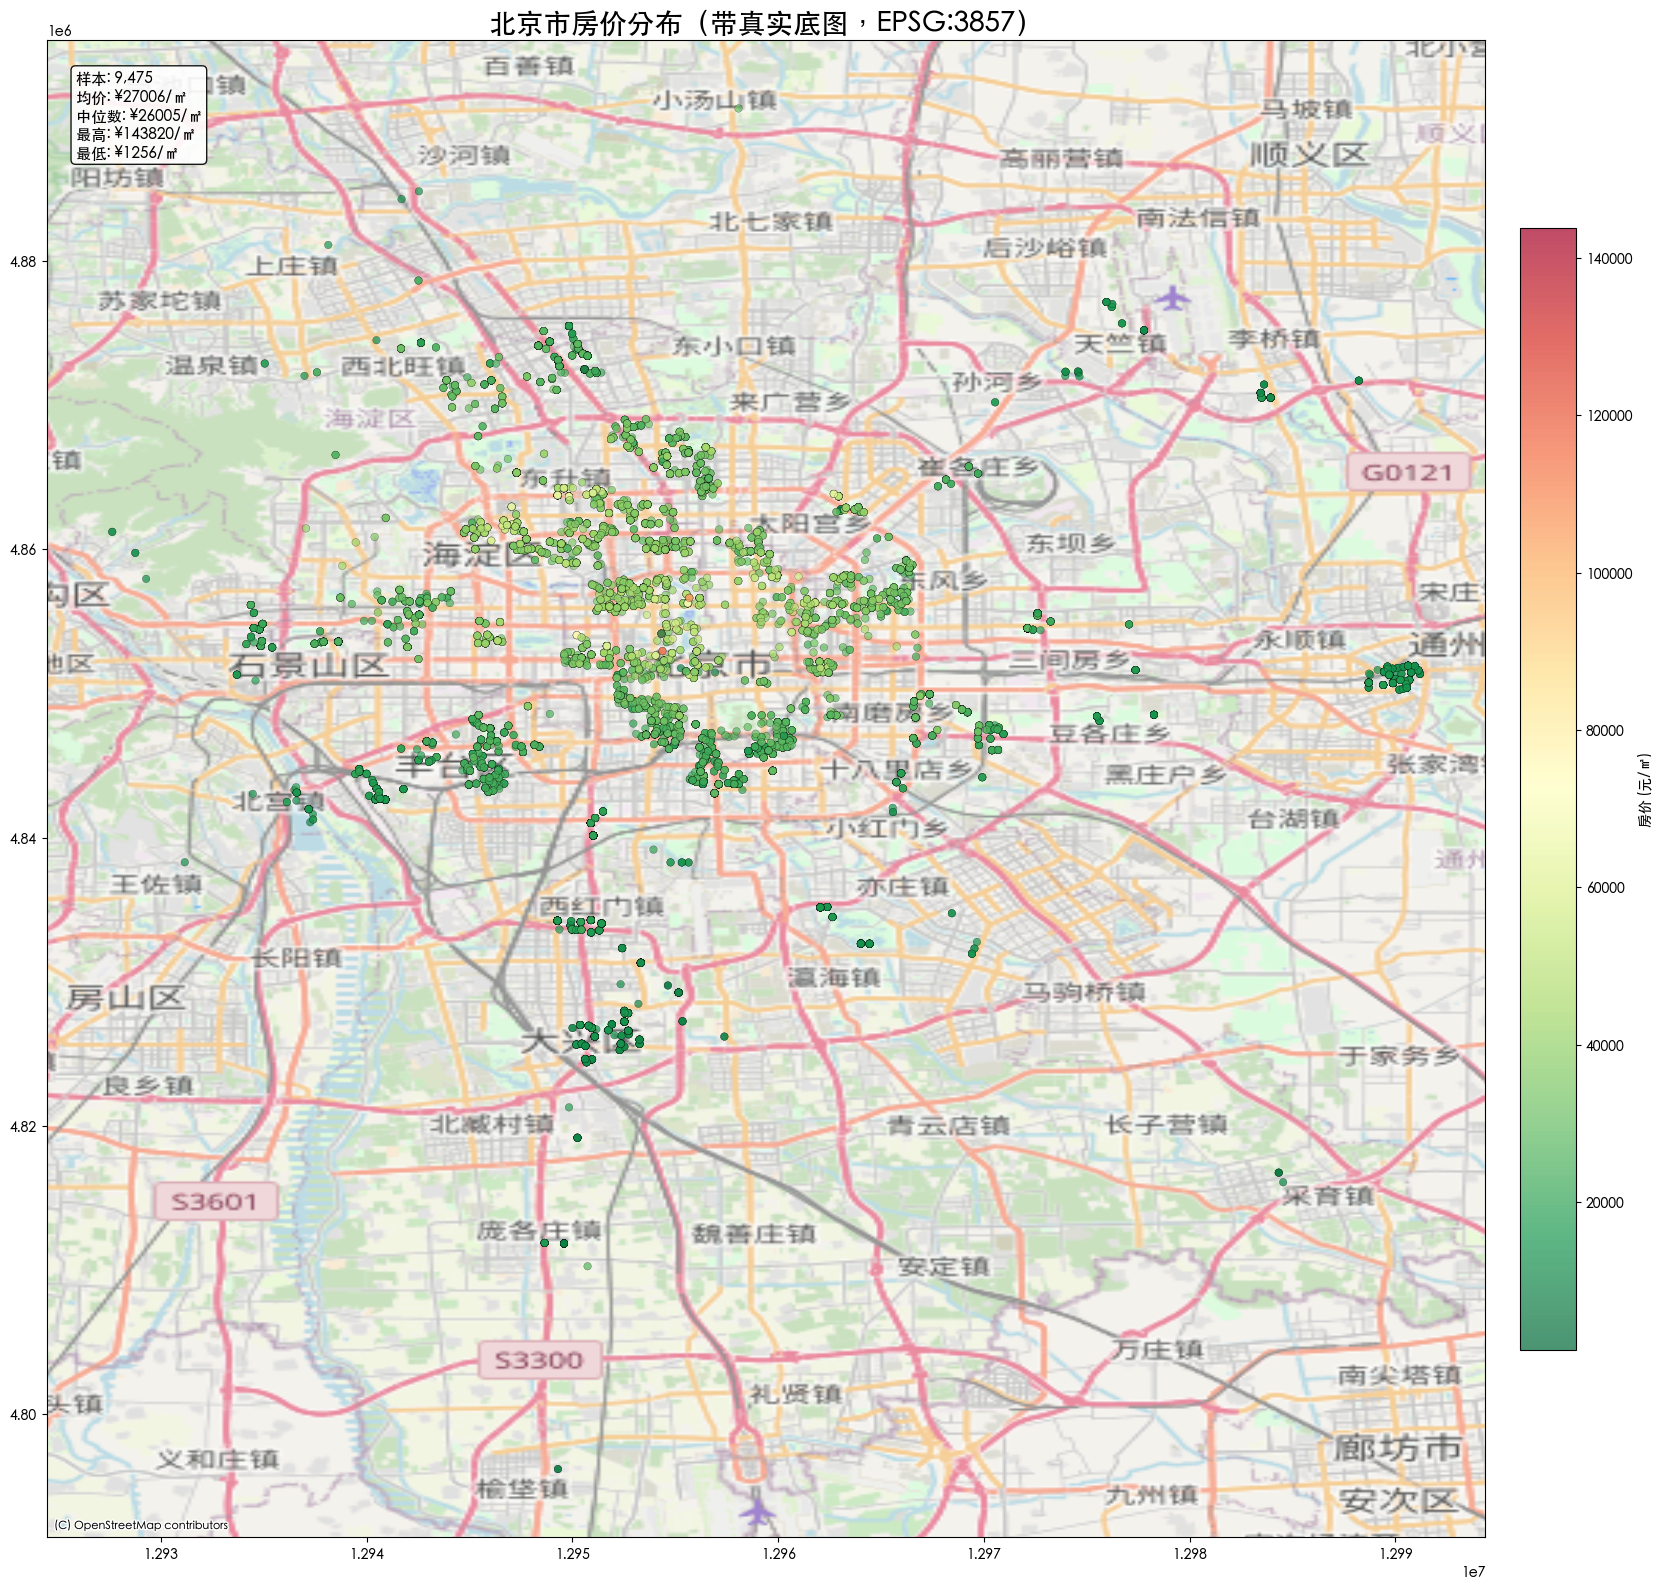

✓ 输出保存: ../image/beijing_house_price_map_webmercator.png


In [13]:
# 修复：避免 PROJ/pyproj 依赖，手动将经纬度转换为 Web Mercator(3857) 再加载底图
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx

# 1) 提取数据并立即验证
lons_list, lats_list, prices_list = [], [], []
for h in houses:
    try:
        lon = float(h['lon'])
        lat = float(h['lat'])
        price = float(h['price_per_meter'])
        # 只添加有效的数据点
        if np.isfinite(lon) and np.isfinite(lat) and np.isfinite(price):
            lons_list.append(lon)
            lats_list.append(lat)
            prices_list.append(price)
    except (KeyError, ValueError, TypeError):
        continue

lons = np.array(lons_list)
lats = np.array(lats_list)
prices = np.array(prices_list)

print(f'✓ 提取到 {len(prices)} 个有效数据点')

# 2) 经纬度 -> Web Mercator(米) 无需 pyproj
R = 6378137.0  # Web Mercator 地球半径
lat_clip = np.clip(lats, -85.05112878, 85.05112878)
X = R * np.deg2rad(lons)
Y = R * np.log(np.tan(np.pi/4 + np.deg2rad(lat_clip)/2))

# 4) 绘图（坐标已是 EPSG:3857）
fig, ax = plt.subplots(figsize=(18, 16))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False

sc = ax.scatter(X, Y, c=prices, cmap='RdYlGn_r', s=30, alpha=0.7,
                linewidth=0.2, edgecolor='k', zorder=5)

# 可视范围留白
pad_x = (X.max() - X.min()) * 0.05 if X.size else 1
pad_y = (Y.max() - Y.min()) * 0.05 if Y.size else 1
ax.set_xlim(X.min() - pad_x, X.max() + pad_x)
ax.set_ylim(Y.min() - pad_y, Y.max() + pad_y)

# 5) 添加真实底图（不传 crs，contextily 默认按 3857 取瓦片，不触发 pyproj）
try:
    ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, alpha=0.8, zorder=1)
    print('✓ 底图加载成功（Web Mercator 方式）')
    map_ok = True
except Exception as e:
    print(f'⚠ 底图加载失败（将使用备用样式）：{e}')
    ax.set_facecolor('#E8F4F8')
    ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.8, color='#CCCCCC')
    map_ok = False

# 6) 颜色条与标题
cbar = plt.colorbar(sc, ax=ax, pad=0.02, shrink=0.75)
cbar.set_label('房价 (元/㎡)')
ax.set_title('北京市房价分布（带真实底图，EPSG:3857）', fontsize=20, fontweight='bold')

# 7) 统计信息
stats = (
    f'样本: {len(prices):,}\n'
    f'均价: ¥{prices.mean():.0f}/㎡\n'
    f'中位数: ¥{np.median(prices):.0f}/㎡\n'
    f'最高: ¥{prices.max():.0f}/㎡\n'
    f'最低: ¥{prices.min():.0f}/㎡'
)
ax.text(0.02, 0.98, stats, transform=ax.transAxes, va='top', fontsize=11,
        bbox=dict(boxstyle='round', fc='white', alpha=0.9))

plt.tight_layout()
out_png = '../image/beijing_house_price_map_webmercator.png'
plt.savefig(out_png, dpi=300, bbox_inches='tight')
plt.show()
print(f'✓ 输出保存: {out_png}')